## Import packages

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from evolutionary_search import EvolutionaryAlgorithmSearchCV
from hyperopt import fmin, tpe, hp, STATUS_OK
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.ensemble import GradientBoostingRegressor

## Step I. Load data

In [3]:
train = pd.read_csv('train.csv')
X_test = pd.read_csv('X_test.csv')

X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

## Step II. Build the model and perform parameter tuning

In [4]:
def modelfit(clf, train, target, performCV=True, cv=10, printFeatureImportance=True):
    clf.fit(train, target)
    pred = clf.predict(train)
    train_r2_score = r2_score(target, pred)
    
    print('\nModel Report')
    print('Train_coef_of_det: %0.6f' %(train_r2_score))
    
    if performCV:
        cv_r2_score = cross_val_score(clf, train, target, cv=cv, scoring='r2', n_jobs=-1)
        print('CV_coef_of_det: Mean-%0.6f | Std-%0.6f | Min-%0.6f | Max-%0.6f' %(np.mean(cv_r2_score),
            np.std(cv_r2_score), np.min(cv_r2_score), np.max(cv_r2_score)))
        
    if printFeatureImportance:
        feat_imp = pd.Series(clf.feature_importances_, 
                             index=train.columns.to_series().tolist()).sort_values(ascending=False)
        rcParams['figure.figsize'] = 20, 6
        feat_imp.plot(kind='bar')
        plt.title('Feature importance')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.show()        

### Baseline model

In [5]:
params = {}
grid = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{}
0.892441763281


In [5]:
params = {}
grid = GridSearchCV(estimator=GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100,
        subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_split=1e-07, init=None, random_state=10,
        max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto'),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{}
0.892590291502


### Grid search

In [7]:
params = {}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=100,
        max_depth=3, subsample=1.0, max_features=None, alpha=0.9, min_samples_split=2, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{}
0.892590291502


In [6]:
params = {'n_estimators': range(10,500,20)}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1,
        max_depth=3, subsample=1.0, max_features=None, alpha=0.9, min_samples_split=2, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'n_estimators': 270}
0.898602257928


In [7]:
params = {'n_estimators': range(270,900,30)}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1,
        max_depth=3, subsample=1.0, max_features=None, alpha=0.9, min_samples_split=2, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'n_estimators': 270}
0.898602257928


In [10]:
params = {'max_depth': range(2,11)}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=270,
        max_features=None, alpha=0.9, min_samples_split=2, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'max_depth': 3}
0.898602257928


In [11]:
params = {'subsample': [i/10.0 for i in range(1,11)]}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=270, max_depth=3,
        max_features=None, alpha=0.9, min_samples_split=2, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'subsample': 1.0}
0.898602257928


In [12]:
params = {'subsample': [i/100.0 for i in range(94,101)]}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=270, max_depth=3,
        max_features=None, alpha=0.9, min_samples_split=2, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'subsample': 0.96}
0.899704744051


In [13]:
params = {'subsample': [i/1000.0 for i in range(954,966)]}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=270, max_depth=3,
        max_features=None, alpha=0.9, min_samples_split=2, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'subsample': 0.962}
0.9012550264


In [14]:
params = {'subsample': [i/10000.0 for i in range(9614,9626)]}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=270, max_depth=3,
        max_features=None, alpha=0.9, min_samples_split=2, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'subsample': 0.962}
0.9012550264


In [22]:
params = {'max_features': [i/10.0 for i in range(1,11)]}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=270, max_depth=3,
        subsample=0.962, alpha=0.9, min_samples_split=2, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'max_features': 1.0}
0.9012550264


In [23]:
params = {'max_features': [i/100.0 for i in range(94,101)]}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=270, max_depth=3,
        subsample=0.962, alpha=0.9, min_samples_split=2, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'max_features': 1.0}
0.9012550264


In [27]:
params = {'alpha': [i/10.0 for i in range(1,10)]}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=270, max_depth=3,
        subsample=0.962, max_features=1.0, alpha=0.9, min_samples_split=2, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'alpha': 0.1}
0.9012550264


In [26]:
params = {'alpha': [i/100.0 for i in range(4,16)]}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=270, max_depth=3,
        subsample=0.962, max_features=1.0, alpha=0.9, min_samples_split=2, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'alpha': 0.04}
0.9012550264


In [28]:
params = {'min_samples_split': range(2,11)}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=270, max_depth=3,
        subsample=0.962, max_features=1.0, alpha=0.1, min_samples_split=2, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'min_samples_split': 8}
0.903712293976


In [29]:
params = {'min_samples_split': range(8,21)}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=270, max_depth=3,
        subsample=0.962, max_features=1.0, alpha=0.1, min_samples_split=2, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'min_samples_split': 8}
0.903712293976


In [30]:
params = {'min_samples_leaf': range(1,11)}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=270, max_depth=3,
        subsample=0.962, max_features=1.0, alpha=0.1, min_samples_split=8, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'min_samples_leaf': 1}
0.903712293976


In [32]:
params = {'min_weight_fraction_leaf': [i/10.0 for i in range(0,6)]}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=270, max_depth=3,
        subsample=0.962, max_features=1.0, alpha=0.1, min_samples_split=8, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'min_weight_fraction_leaf': 0.0}
0.903712293976


In [33]:
params = {'min_weight_fraction_leaf': [i/100.0 for i in range(0,7)]}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=270, max_depth=3,
        subsample=0.962, max_features=1.0, alpha=0.1, min_samples_split=8, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'min_weight_fraction_leaf': 0.0}
0.903712293976


In [34]:
params = {'min_impurity_split': [i/10**8 for i in range(1,101,10)]}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=270, max_depth=3,
        subsample=0.962, max_features=1.0, alpha=0.1, min_samples_split=8, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'min_impurity_split': 0}
0.903712293976


In [35]:
params = {'presort': [True,False,'auto']}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=270, max_depth=3,
        subsample=0.962, max_features=1.0, alpha=0.1, min_samples_split=8, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'presort': True}
0.903712293976


In [36]:
params = {'loss': ['ls','lad','huber','quantile']}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=270, max_depth=3,
        subsample=0.962, max_features=1.0, alpha=0.1, min_samples_split=8, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'loss': 'ls'}
0.903712293976


In [37]:
params = {'criterion': ['friedman_mse','mse','mae']}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=270, max_depth=3,
        subsample=0.962, max_features=1.0, alpha=0.1, min_samples_split=8, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'criterion': 'friedman_mse'}
0.903712293976


In [39]:
params = {'max_leaf_nodes': [2**i for i in range(3,10)]}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=270, max_depth=3,
        subsample=0.962, max_features=1.0, alpha=0.1, min_samples_split=8, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'max_leaf_nodes': 8}
0.899921511293


In [40]:
params = {'max_leaf_nodes': range(150,400,20)}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=270, max_depth=3,
        subsample=0.962, max_features=1.0, alpha=0.1, min_samples_split=8, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'max_leaf_nodes': 150}
0.89548395402


Performance degrades. So, it's better to keep 'max_leaf_nodes'=None.

### Final model

In [41]:
params = {}
grid = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=270, max_depth=3,
        subsample=0.962, max_features=1.0, alpha=0.1, min_samples_split=8, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10),
        param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{}
0.903712293976



Model Report
Train_coef_of_det: 0.983127
CV_coef_of_det: Mean-0.903712 | Std-0.022477 | Min-0.854023 | Max-0.940672


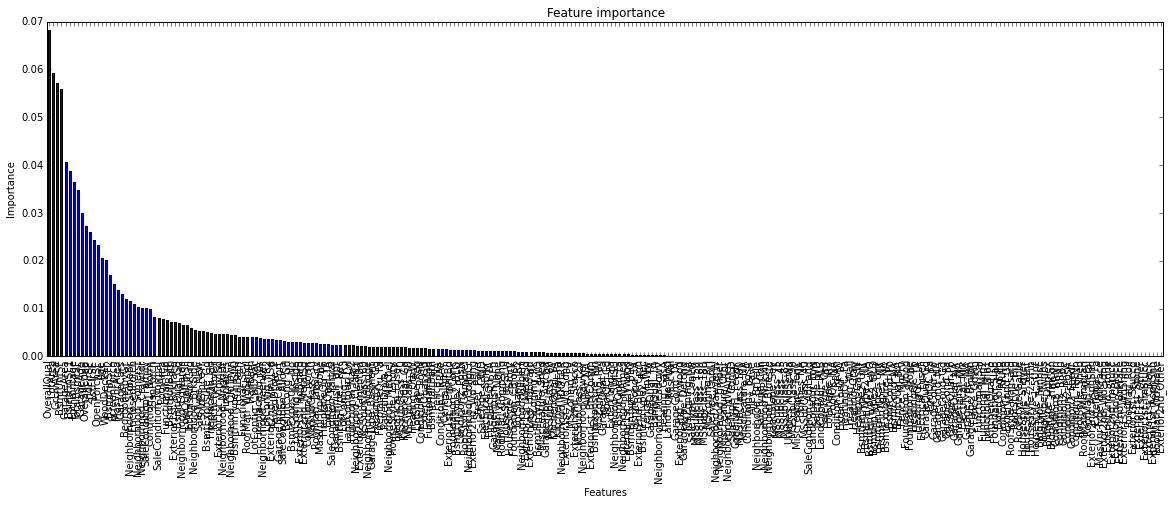

In [6]:
reg1 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=270, max_depth=3,
        subsample=0.962, max_features=1.0, alpha=0.1, min_samples_split=8, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, presort='auto', loss='ls', criterion='friedman_mse',
        init=None, verbose=0, max_leaf_nodes=None, warm_start=True, random_state=10)
modelfit(reg1, X_train, y_train)

### Grid search + Random search

In [ ]:
params = {
          'learning_rate': [0.1],
          'n_estimators': range(10,400,10),
          'max_depth': range(2,7),
          'subsample': [i/1000.0 for i in range(940,990)],
          'max_features': [i/100.0 for i in range(90,101)],
          'alpha': [i/100.0 for i in range(1,30)],
          'min_samples_split': range(6,13),
          'min_samples_leaf': range(1,5),
          'min_weight_fraction_leaf': [i/100.0 for i in range(0,20)], 
          'min_impurity_split': [i/10**8 for i in range(1,101,10)],
          'presort': [True,False,'auto'],
          'loss': ['ls','lad','huber','quantile'],
          'criterion': ['friedman_mse','mse','mae'],
          'init': [None],
          'verbose': [0],
          'max_leaf_nodes': [None],
          'warm_start': [True],
          'random_state': [10]
         }
rand = RandomizedSearchCV(estimator=GradientBoostingRegressor(), param_distributions=params, cv=10, scoring='r2',
         n_iter=1000, random_state=10, n_jobs=-1)
rand.fit(X_train, y_train)
print 'Best parameters: \n', rand.best_params_
print '\tBest score: ', rand.best_score_

In [ ]:
params = {}
reg1 = GradientBoostingRegressor(
                                learning_rate = params['learning_rate'],
                                n_estimators = params['n_estimators'],
                                max_depth = params['max_depth'],
                                subsample = params['subsample'],
                                max_features = params['max_features'],
                                alpha = params['alpha'],
                                min_samples_split = params['min_samples_split'],
                                min_samples_leaf = params['min_samples_leaf'],
                                min_weight_fraction_leaf = params['min_weight_fraction_leaf'],
                                min_impurity_split = params['min_impurity_split'],
                                presort = params['presort'],
                                loss = params['loss'],
                                criterion = params['criterion'],
                                init = params['init'],
                                verbose = params['verbose'],
                                max_leaf_nodes = params['max_leaf_nodes'],
                                warm_start = params['warm_start'],
                                random_state = params['random_state']
                                )
modelfit(reg1, X_train, y_train)

### Grid search + Bayesian optimization ( 'hyperopt' package )

In [6]:
min_score = float('inf')
best_params = ''
c = 0

def score(params):
    global c, min_score, best_params
    c += 1
    print "Interation no.: ", c
    print "Training with params : "
    print params
    reg = GradientBoostingRegressor(
                                    learning_rate = params['learning_rate'],
                                    n_estimators = params['n_estimators'],
                                    max_depth = params['max_depth'],
                                    subsample = params['subsample'],
                                    max_features = params['max_features'],
                                    alpha = params['alpha'],
                                    min_samples_split = params['min_samples_split'],
                                    min_samples_leaf = params['min_samples_leaf'],
                                    min_weight_fraction_leaf = params['min_weight_fraction_leaf'],
                                    min_impurity_split = params['min_impurity_split'],
                                    presort = params['presort'],
                                    loss = params['loss'],
                                    criterion = params['criterion'],
                                    init = params['init'],
                                    verbose = params['verbose'],
                                    max_leaf_nodes = params['max_leaf_nodes'],
                                    warm_start = params['warm_start'],
                                    random_state = params['random_state']
                                    )
    cv_r2_score = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2', n_jobs=-1)
    score = 1 - np.mean(cv_r2_score) 
    if score < min_score:
        min_score = score
        best_params = params     
    print "\tScore: {0}".format(1-score)
    print "\tBest score: {0}\n".format(1-min_score)
    return {'loss': score, 'status': STATUS_OK}

def optimize():
    space = {
              'learning_rate': hp.choice('learning_rate', [0.1]),
              'n_estimators': hp.choice('n_estimators', range(10,400,10)),
              'max_depth': hp.choice('max_depth', range(2,7)),
              'subsample': hp.uniform('subsample', 0.94, 0.99),
              'max_features': hp.uniform('max_features', 0.9, 1.0),
              'alpha': hp.uniform('alpha', 0.01, 0.3),
              'min_samples_split': hp.choice('min_samples_split', range(6,13)),
              'min_samples_leaf': hp.choice('min_samples_leaf', range(1,5)),
              'min_weight_fraction_leaf': hp.uniform('min_weight_fraction_leaf', 0.0, 0.2), 
              'min_impurity_split': hp.choice('min_impurity_split', [10**(-7)]),
              'presort': hp.choice('presort', [True,False,'auto']),
              'loss': hp.choice('loss', ['ls','lad','huber','quantile']),
              'criterion': hp.choice('criterion', ['friedman_mse','mse','mae']),
              'init': hp.choice('init', [None]),
              'verbose': hp.choice('verbose', [0]),
              'max_leaf_nodes': hp.choice('max_leaf_nodes', [None]),
              'warm_start': hp.choice('warm_start', [True]),
              'random_state': hp.choice('random_state', [10])        
             }
    best = fmin(score, space, algo=tpe.suggest, max_evals=1000)    
  
optimize()
print 'Best parameters:'
print best_params
print "\tScore {0}".format(1-min_score)

Interation no.:  1
Training with params : 
{'warm_start': True, 'verbose': 0, 'max_leaf_nodes': None, 'learning_rate': 0.1, 'min_samples_leaf': 3, 'n_estimators': 300, 'max_features': 0.9753804719598135, 'alpha': 0.2233751103448373, 'presort': True, 'loss': 'lad', 'min_impurity_split': 1e-07, 'subsample': 0.9896454277222712, 'init': None, 'min_weight_fraction_leaf': 0.09717975917579116, 'criterion': 'friedman_mse', 'random_state': 10, 'min_samples_split': 9, 'max_depth': 6}
	Score: 0.839096949793
	Best score: 0.839096949793

Interation no.:  2
Training with params : 
{'warm_start': True, 'verbose': 0, 'max_leaf_nodes': None, 'learning_rate': 0.1, 'min_samples_leaf': 3, 'n_estimators': 130, 'max_features': 0.9816528274188027, 'alpha': 0.08513541189169502, 'presort': True, 'loss': 'ls', 'min_impurity_split': 1e-07, 'subsample': 0.9534548707264723, 'init': None, 'min_weight_fraction_leaf': 0.11902825911394346, 'criterion': 'mse', 'random_state': 10, 'min_samples_split': 10, 'max_depth': 2


Model Report
Train_coef_of_det: 0.979317
CV_coef_of_det: Mean-0.903966 | Std-0.021303 | Min-0.859873 | Max-0.943267


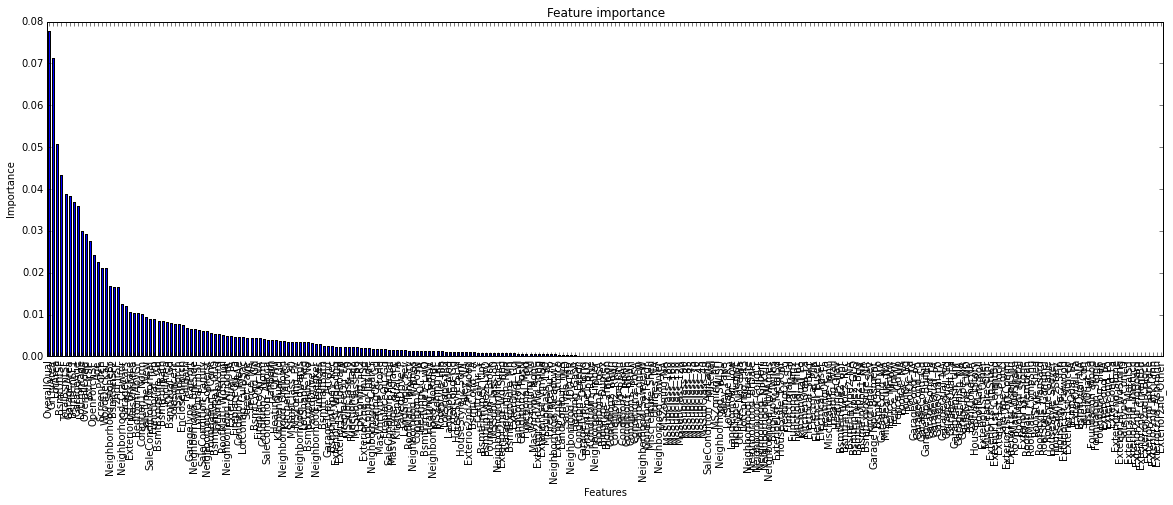

In [7]:
params = {'warm_start': True, 'verbose': 0, 'max_leaf_nodes': None, 'learning_rate': 0.1, 'min_samples_leaf': 2,
          'n_estimators': 220, 'max_features': 0.9827404178094029, 'alpha': 0.16846758069342863, 'presort': True,
          'loss': 'ls', 'min_impurity_split': 1e-07, 'subsample': 0.9800365433265062, 'init': None,
          'min_weight_fraction_leaf': 0.000546805267271948, 'criterion': 'friedman_mse', 'random_state': 10,
          'min_samples_split': 9, 'max_depth': 3}
reg1 = GradientBoostingRegressor(
                                learning_rate = params['learning_rate'],
                                n_estimators = params['n_estimators'],
                                max_depth = params['max_depth'],
                                subsample = params['subsample'],
                                max_features = params['max_features'],
                                alpha = params['alpha'],
                                min_samples_split = params['min_samples_split'],
                                min_samples_leaf = params['min_samples_leaf'],
                                min_weight_fraction_leaf = params['min_weight_fraction_leaf'],
                                min_impurity_split = params['min_impurity_split'],
                                presort = params['presort'],
                                loss = params['loss'],
                                criterion = params['criterion'],
                                init = params['init'],
                                verbose = params['verbose'],
                                max_leaf_nodes = params['max_leaf_nodes'],
                                warm_start = params['warm_start'],
                                random_state = params['random_state']
                                )
modelfit(reg1, X_train, y_train)

### Grid search + Genetic programming ( 'sklearn-deap' package )

In [ ]:
params = {
          'learning_rate': [0.1],
          'n_estimators': range(10,400,10),
          'max_depth': range(2,7),
          'subsample': [i/1000.0 for i in range(940,990)],
          'max_features': [i/100.0 for i in range(90,101)],
          'alpha': [i/100.0 for i in range(1,30)],
          'min_samples_split': range(6,13),
          'min_samples_leaf': range(1,5),
          'min_weight_fraction_leaf': [i/100.0 for i in range(0,20)], 
          'min_impurity_split': [i/10**8 for i in range(1,101,10)],
          'presort': [True,False,'auto'],
          'loss': ['ls','lad','huber','quantile'],
          'criterion': ['friedman_mse','mse','mae'],
          'init': [None],
          'verbose': [0],
          'max_leaf_nodes': [None],
          'warm_start': [True],
          'random_state': [10]
         }
evol = EvolutionaryAlgorithmSearchCV(estimator=GradientBoostingRegressor(), params=params, cv=10,
        scoring='r2', population_size=50, gene_mutation_prob=0.1, gene_crossover_prob=0.5, tournament_size=3,
        generations_number=10, verbose=True, n_jobs=-1)
evol.fit(X_train, y_train)

In [ ]:
params = {}
reg1 = GradientBoostingRegressor(
                                learning_rate = params['learning_rate'],
                                n_estimators = params['n_estimators'],
                                max_depth = params['max_depth'],
                                subsample = params['subsample'],
                                max_features = params['max_features'],
                                alpha = params['alpha'],
                                min_samples_split = params['min_samples_split'],
                                min_samples_leaf = params['min_samples_leaf'],
                                min_weight_fraction_leaf = params['min_weight_fraction_leaf'],
                                min_impurity_split = params['min_impurity_split'],
                                presort = params['presort'],
                                loss = params['loss'],
                                criterion = params['criterion'],
                                init = params['init'],
                                verbose = params['verbose'],
                                max_leaf_nodes = params['max_leaf_nodes'],
                                warm_start = params['warm_start'],
                                random_state = params['random_state']
                                )
modelfit(reg1, X_train, y_train)

### Make predictions and save results

In [ ]:
test_pred = reg1.predict(X_test)
dictn = {'Id': range(1461,2920), 'SalePrice': test_pred}
res = pd.DataFrame(dictn)
res.to_csv('submission.csv', index=0)